<a href="https://colab.research.google.com/github/AMEYABHAVE/Cristl/blob/main/Time_series_functions_for_gyroscope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False 

In [40]:
df = pd.read_csv('https://zenodo.org/record/4642560/files/CHARM_v1.1_gyroscope.csv?download=1')

In [41]:
df

,name,time,gyr_x,gyr_y,gyr_z,activity,repetition,uuid
0,gyroscope,1614343981544999936,-0.309540,7.679596,6.142029,CHAIR,1,33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
1,gyroscope,1614343986540999936,-0.530884,7.897354,5.765747,CHAIR,1,33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
2,gyroscope,1614343989556000000,-0.608643,8.231140,5.266846,CHAIR,1,33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
3,gyroscope,1614343990545999872,-0.570953,8.260452,5.229172,CHAIR,1,33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
4,gyroscope,1614343992488000000,-0.816223,8.244308,5.284195,CHAIR,1,33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
...,...,...,...,...,...,...,...,...
93855,gyroscope,1616361343667000064,-0.542252,5.791656,10.423981,DOWNSTAIRS,6,9f6b4653-f4af-4c04-9b4e-3de934ff9345
93856,gyroscope,1616361343750000128,-0.274246,4.609604,10.543625,DOWNSTAIRS,6,9f6b4653-f4af-4c04-9b4e-3de934ff9345
93857,gyroscope,1616361343873999872,-1.220612,3.207413,7.840927,DOWNSTAIRS,6,9f6b4653-f4af-4c04-9b4e-3de934ff9345
93858,gyroscope,1616361343996999936,-0.088196,3.592667,8.845322,DOWNSTAIRS,6,9f6b4653-f4af-4c04-9b4e-3de934ff9345


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93860 entries, 0 to 93859
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        93860 non-null  object 
 1   time        93860 non-null  int64  
 2   gyr_x       93860 non-null  float64
 3   gyr_y       93860 non-null  float64
 4   gyr_z       93860 non-null  float64
 5   activity    93860 non-null  object 
 6   repetition  93860 non-null  int64  
 7   uuid        93860 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 5.7+ MB


In [43]:
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)

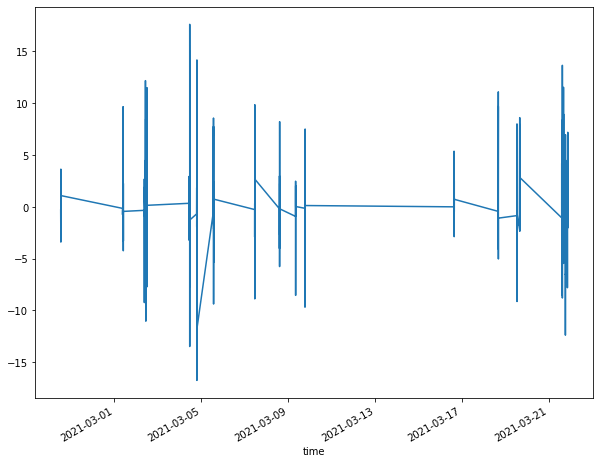

In [45]:
df.set_index('time')['gyr_x'].plot()

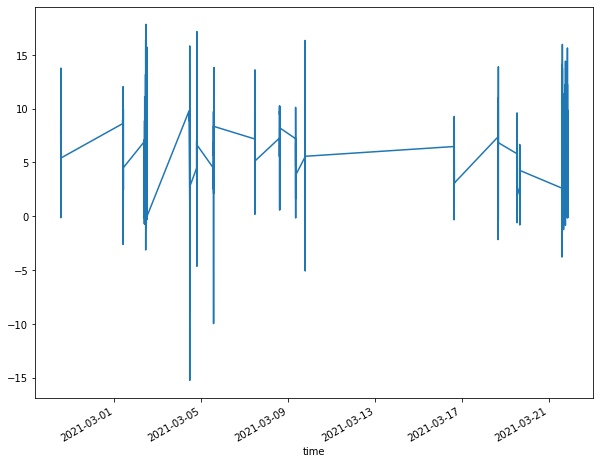

In [46]:
df.set_index('time')['gyr_y'].plot()

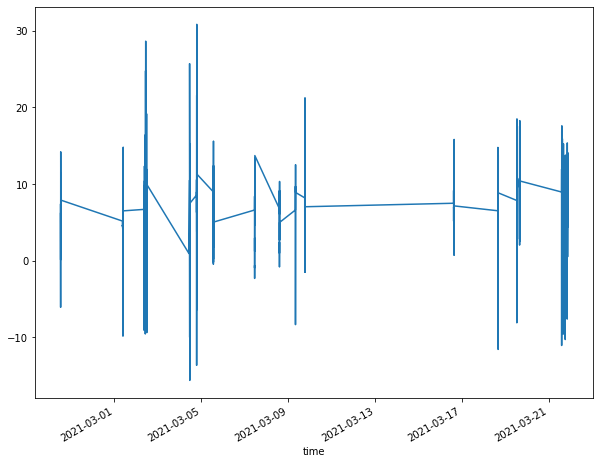

In [47]:
df.set_index('time')['gyr_z'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f94767a50>,
      dtype=object)

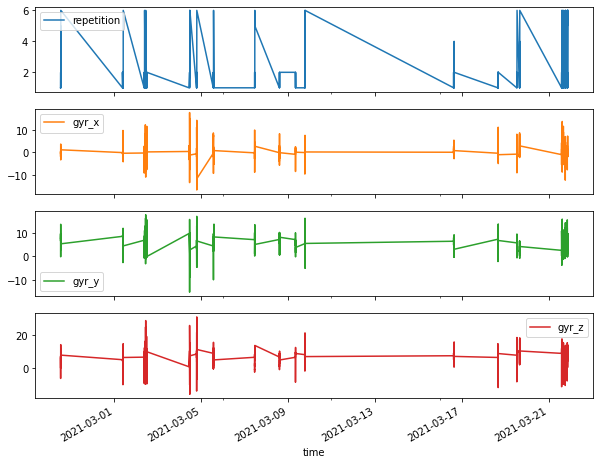

In [48]:
df.set_index('time')[['repetition','gyr_x','gyr_y','gyr_z',]].plot(subplots=True)

In [49]:
df.count()

name          93860
time          93860
gyr_x         93860
gyr_y         93860
gyr_z         93860
activity      93860
repetition    93860
uuid          93860
dtype: int64

In [50]:
features=df[['activity','gyr_x','gyr_y','gyr_z']].to_numpy().tolist()
target=df['activity'].tolist()

In [51]:
features[0:11]

[['CHAIR', -0.309539794921875, 7.679595947265625, 6.14202880859375],
 ['CHAIR', -0.5308837890625, 7.897354125976562, 5.7657470703125],
 ['CHAIR', -0.608642578125, 8.23114013671875, 5.266845703125],
 ['CHAIR', -0.570953369140625, 8.260452270507812, 5.229171752929688],
 ['CHAIR', -0.81622314453125, 8.244308471679688, 5.284194946289063],
 ['CHAIR', -0.986114501953125, 8.245498657226562, 5.186691284179688],
 ['CHAIR', -0.7593994140625, 8.392059326171875, 5.19805908203125],
 ['CHAIR', -0.7833251953125, 8.36932373046875, 5.2542877197265625],
 ['CHAIR', -0.8622894287109375, 8.332244873046875, 5.199249267578125],
 ['CHAIR', -0.793487548828125, 8.415390014648438, 5.134048461914063],
 ['CHAIR', -0.7288818359375, 8.420181274414062, 5.13165283203125]]

In [52]:
target[0:11]

['CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR']

In [53]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [54]:
ts_generator[0]

(array([[['CHAIR', '-0.309539794921875', '7.679595947265625',
          '6.14202880859375'],
         ['CHAIR', '-0.5308837890625', '7.897354125976562',
          '5.7657470703125'],
         ['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688']]], dtype='<U18'), array(['CHAIR'], dtype='<U5'))

In [55]:
ts_generator[0][0][0].shape

(6, 4)

In [56]:
ts_generator[1]

(array([[['CHAIR', '-0.5308837890625', '7.897354125976562',
          '5.7657470703125'],
         ['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688'],
         ['CHAIR', '-0.7593994140625', '8.392059326171875',
          '5.19805908203125']]], dtype='<U18'), array(['CHAIR'], dtype='<U5'))

In [57]:
ts_generator[2]

(array([[['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688'],
         ['CHAIR', '-0.7593994140625', '8.392059326171875',
          '5.19805908203125'],
         ['CHAIR', '-0.7833251953125', '8.36932373046875',
          '5.2542877197265625']]], dtype='<U18'),
 array(['CHAIR'], dtype='<U5'))

In [58]:
len(ts_generator)

93854

In [59]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=2)

In [60]:
len(ts_generator)

46927

In [61]:
ts_generator[0]

(array([[['CHAIR', '-0.309539794921875', '7.679595947265625',
          '6.14202880859375'],
         ['CHAIR', '-0.5308837890625', '7.897354125976562',
          '5.7657470703125'],
         ['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688']],
 
        [['CHAIR', '-0.5308837890625', '7.897354125976562',
          '5.7657470703125'],
         ['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.1866912

In [62]:
ts_generator[1]

(array([[['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688'],
         ['CHAIR', '-0.7593994140625', '8.392059326171875',
          '5.19805908203125'],
         ['CHAIR', '-0.7833251953125', '8.36932373046875',
          '5.2542877197265625']],
 
        [['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688'],
         ['CHAIR', '-0.7593994140625', '8.392059326171875',
          '5.19805908203125'],
         ['CHAIR', '-0.7833251953125', '8.36932373046875',
          '5.25

In [63]:
pd.concat([df['activity'],df['activity'].shift(-1), df['activity'].shift(-2)],axis=1)

,activity,activity,activity
0,CHAIR,CHAIR,CHAIR
1,CHAIR,CHAIR,CHAIR
2,CHAIR,CHAIR,CHAIR
3,CHAIR,CHAIR,CHAIR
4,CHAIR,CHAIR,CHAIR
...,...,...,...
93855,DOWNSTAIRS,DOWNSTAIRS,DOWNSTAIRS
93856,DOWNSTAIRS,DOWNSTAIRS,DOWNSTAIRS
93857,DOWNSTAIRS,DOWNSTAIRS,DOWNSTAIRS
93858,DOWNSTAIRS,DOWNSTAIRS,NaN


In [64]:
multi_target=pd.concat([df['activity'].shift(-1), df['activity'].shift(-2)],axis=1).dropna().to_numpy().tolist()

In [65]:
multi_target[0:13]

[['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR']]

In [66]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [67]:
ts_generator[0]

(array([[['CHAIR', '-0.309539794921875', '7.679595947265625',
          '6.14202880859375'],
         ['CHAIR', '-0.5308837890625', '7.897354125976562',
          '5.7657470703125'],
         ['CHAIR', '-0.608642578125', '8.23114013671875',
          '5.266845703125'],
         ['CHAIR', '-0.570953369140625', '8.260452270507812',
          '5.229171752929688'],
         ['CHAIR', '-0.81622314453125', '8.244308471679688',
          '5.284194946289063'],
         ['CHAIR', '-0.986114501953125', '8.245498657226562',
          '5.186691284179688']]], dtype='<U18'),
 array([['CHAIR', 'CHAIR']], dtype='<U5'))

In [68]:
ts_generator[1]

(array([[['CHAIR', '-0.7593994140625', '8.392059326171875',
          '5.19805908203125'],
         ['CHAIR', '-0.7833251953125', '8.36932373046875',
          '5.2542877197265625'],
         ['CHAIR', '-0.8622894287109375', '8.332244873046875',
          '5.199249267578125'],
         ['CHAIR', '-0.793487548828125', '8.415390014648438',
          '5.134048461914063'],
         ['CHAIR', '-0.7288818359375', '8.420181274414062',
          '5.13165283203125'],
         ['CHAIR', '-0.721710205078125', '8.36993408203125',
          '5.129852294921875']]], dtype='<U19'),
 array([['CHAIR', 'CHAIR']], dtype='<U5'))